# 手动实现训练集和测试集切分 

In [3]:
def data_split(features,labels,rate=0.7):
    """
    训练集和测试集切分函数
    :param features: 输入的特征张量
    :param labels:输入的标签张量
    :param rate:训练集占所有数据的比例
    :return Xtrain，Xtest，ytrain，ytest: 返回特征张量的训练集、测试集，以及标签张量训练集、测试集
    """
    num_examples = len(features)                       # 数据总量
    indices = list(range(num_examples))                # 数据集行索引
    random.shuffle(indices)                            # 乱序调整
    num_train = int(num_examples * rate)               # 训练集数量
    indices_train = torch.tensor(indices[:num_train])  # 在已经乱序的indices中挑出前num_train数量的行索引值
    indices_test = torch.tensor(indices[num_train:])   # 在已经乱序的indices中挑出后num_test数量的行索引值
    Xtrain = features[indices_train]                   # 训练集特征张量
    ytrain = labels[indices_train]                     # 训练集标签张量
    Xtest = features[indices_test]                     # 测试集特征张量
    ytest = labels[indices_test]                       # 测试集标签张量
    return Xtrain,Xtest,ytrain,ytest

测试函数性能

In [4]:
f = torch.arange(10)
l = torch.arange(1,11)
f
l

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
data_split(f,l)

(tensor([4, 1, 2, 6, 0, 8, 3]),
 tensor([5, 7, 9]),
 tensor([5, 2, 3, 7, 1, 9, 4]),
 tensor([ 6,  8, 10]))

带入训练集进行建模，利用测试集评估模型建模效果

In [6]:
# 设置随机数种子
torch.manual_seed(420)

# 生成回归类数据集
features,labels = tensorGenReg()

# 切分数据集和测试集
Xtrain,Xtest,ytrain,ytest = data_split(features,labels)

# 初始化核心参数
batch_size = 10   # 小批的数量
lr = 0.03         # 学习率
num_epochs = 5    # 训练过程遍历几次数据
w = torch.zeros(3,1,requires_grad = True)  # 随机设置初始权重

# 参与训练的模型方程
net = linreg    # 使用线性回归方程
loss = MSE_loss # MSE均方误差作为loss

# 模型训练过程
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,Xtrain,ytrain):
        l = loss(net(X,w),y)
        l.backward()
        sgd(w,lr)

查看训练结果

In [7]:
w

tensor([[ 2.0002],
        [-0.9996],
        [ 1.0004]], requires_grad=True)

查看模型在训练集、测试集上的MSE

In [8]:
MSE_loss(torch.mm(Xtrain,w),ytrain)
MSE_loss(torch.mm(Xtest,w),ytest)

tensor(9.4750e-05, grad_fn=<DivBackward0>)

tensor(0.0001, grad_fn=<DivBackward0>)

至此，我们就完成了一整个从数据集划分，到训练集训练，再到测试集上测试模型性能的整个流程。

# Dataset和DataLoader基本使用方法与数据集切分函数

## Dataset和DataLoader的基本使用方法 

<li> random_split随机函数切分

首先，在PyTorch的 torch.utils.data 中，提供了 random_split 函数可用于数据集切分

In [9]:
from torch.utils.data import random_split

测试函数功能

In [10]:
t = torch.arange(12).reshape(4,3)
t

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [11]:
random_split(t,[2,2])

根据生成结果可知， random_split 函数其实生成了生成器切分结果的生成器，并不是和此前定义的函数一样，直接切分数据后返回。当然这也符合utilsdata模块主要生成映射式和迭代式对象的一般规定。是逻辑上的切分并没有产生实际切分后的tensor

In [12]:
# 随机切成两个部分，每个部分都有两个张量，可以用d,p分别接受某一部分的两个张量
for d,p in random_split(t,[2,2]):
    print(d,p)

# 随机切成两个部分，一部分三张量，二部分两张量，所以一部分用三变量接受，二部分用两变量接受，所以不能用for循环直接取出打印
for d in random_split(t,[3,1]):
    print(d.dataset[d.indices])

# 但可以用双重for循环直接打印取出
for i in random_split(t,[3,1]):
    for j in i:
        print(j)

tensor([3, 4, 5]) tensor([6, 7, 8])
tensor([0, 1, 2]) tensor([ 9, 10, 11])
tensor([[ 9, 10, 11],
        [ 0,  1,  2],
        [ 3,  4,  5]])
tensor([[6, 7, 8]])
tensor([3, 4, 5])
tensor([6, 7, 8])
tensor([0, 1, 2])
tensor([ 9, 10, 11])


In [13]:
# 详解
t = torch.arange(12).reshape(4,3)
d = random_split(t,[3,1])

for i in d[0]:
    print(i)
for i in d[1]:
    print(i)

tensor([6, 7, 8])
tensor([ 9, 10, 11])
tensor([0, 1, 2])
tensor([3, 4, 5])


In [14]:
import torch
from torch.utils.data import random_split

t = torch.arange(12).reshape(4, 3)

# 将t划分为大小为3和1的两个子集

# 分别接收
tr, te = random_split(t, [3, 1])
print(tr.dataset[tr.indices])
print(te.dataset[te.indices])

# 循环接收
for d in random_split(t,[3,1]):
    print(d.dataset[d.indices])

tensor([[ 3,  4,  5],
        [ 9, 10, 11],
        [ 0,  1,  2]])
tensor([[6, 7, 8]])
tensor([[3, 4, 5],
        [6, 7, 8],
        [0, 1, 2]])
tensor([[ 9, 10, 11]])


<li> Dataset和DataLoader<br>
由于在大多数调库建模过程中，我们都是先通过创建Dataset的子类并将数据保存为该子类类型，然后再使用Dataloader进行数据载入，因此更为通用的做法是先利用Dataset和DatasetLoader这两个类进行数据的读取、预处理和载入，然后再使用random_split函数进行切分

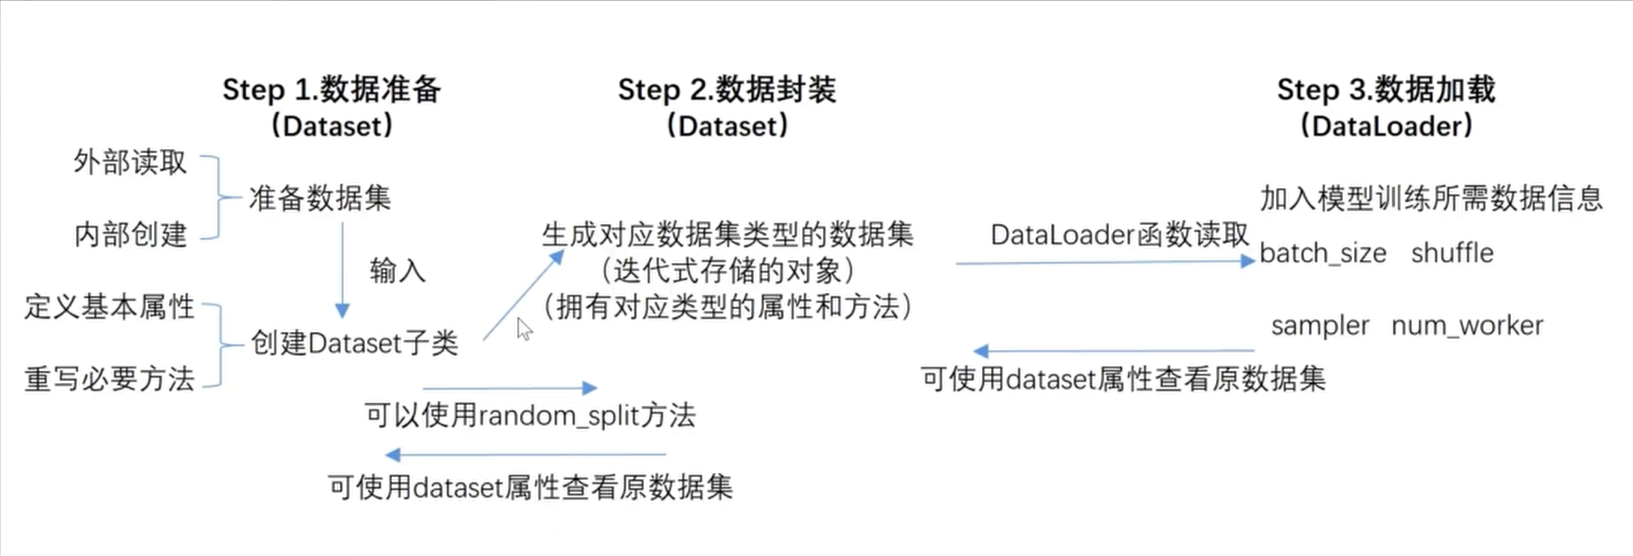

In [15]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

<li> 创建数据类

此前我们使用的TensorDataset函数其实就是个简单的类型转化函数，将数据统一转化为"TensorDataset”类然后带入模型进行计算。

In [16]:
features,labels = tensorGenReg(bias=False)
features

tensor([[-1.4851, -0.9890, -0.0712],
        [ 0.4245,  1.5282,  1.0762],
        [ 0.5864,  0.1298,  1.6104],
        ...,
        [ 0.7057,  0.6518,  0.3281],
        [-0.4938, -0.7599,  2.7343],
        [-0.5423, -2.0576,  1.3468]])

In [17]:
data = TensorDataset(features,labels)
data

而TensorDataset其实使用面较窄，最直接的限制就是该函数只能将张量类型转化为TensorDataset类

<b>若想将其他数据类型转换成TensorDataset类<b>一般方法是手动创建一个继承自torch.utils.data.dataset的数据类，用来作为当前数据的表示

In [1]:
from sklearn.datasets import load_breast_cancer as LBC
data = LBC()

In [12]:
data.data # 返回数据集的特征数组
data.data.shape

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

(569, 30)

In [13]:
data.target # 返回数据集的标签数组
data.target.shape

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

(569,)

In [4]:
len(data.data) # 返回数据集总个数

569

接下来，创建一个用于表示该数据集的Dataset的子类。在创建Dataset的子类过程中必须要重写getitem方法和len方法，其中getitem方法返回输入索引后对应的特征和标签，而len方法则返回数据集的总数据个数，当然，在必须要进行的init初始化过程中，我们也可输入可代表数据集基本属性的相关内容，包括数据集的特征、标签、大小等等，视情况而定。

In [14]:
class LBCDataset(Dataset):
    def __init__(self,data):       # 创建该类时需要输入skLearn 导入的数据集
        self.features = data.data  # features属性返回数据集特征
        self.labels = data.target  # Labels 属性返回数据集标签
        self.lens = len(data.data) # Lens 属性返回数据集大小
    
    def __getitem__(self,index):
        # 调用该方法时需要输入index数值，方法最终返回index对应的特征和标签
        return self.features[index , :],self.labels[index]
        # index是第几行即第几个样本， ":"即取出全部特征
    
    def __len__(self):
        #  调用该方法不需要输入额外参数，方法最终返回数据集大小
        return self.lens

In [15]:
data = LBC()
LBC_data = LBCDataset(data)

In [17]:
LBC_data.features
LBC_data.features.shape

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

(569, 30)

In [19]:
LBC_data.lens

569

In [26]:
# 查看第三条数据
LBC_data.__getitem__(2)

# 也可以直接索引
LBC_data[2]

(array([1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02]),
 0)

(array([1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
        1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02]),
 0)

In [27]:
LBC_data.features[2]

array([1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
       1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
       4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
       2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
       1.444e-01, 4.245e-01, 4.504e-01, 2.430e-01, 3.613e-01, 8.758e-02])

In [28]:
LBC_data.labels[2]

0

此时LBC.data已经是可以输入Dataloader进而带入模型进行训练的数据集了，不过在此之前，我们可以使用random_split方法对其进行切分

<li> 确定训练集、测试集大小，此处以7: 3划分训练集和测试集

In [29]:
num_train = int(LBC_data.lens * 0.7)
num_test = LBC_data.lens - num_train
num_train
num_test

398

171

In [30]:
LBC_train,LBC_test = random_split(LBC_data,[num_train,num_test])

注，此时切分的结果是一个映射式的对象，只有dataset和indices两个属性，其中dataset属性用于查看原数据集对象，indices属性用于查看切分后数据集的每一条数据的index (序号)。

In [25]:
# 可以由切分结果通过dataset还原原始数据集
LBC_train.dataset == LBC_data

True

In [31]:
# 可以在原始数据集中查找切分数据集
LBC_train.indices

[567,
 212,
 537,
 562,
 445,
 483,
 430,
 209,
 269,
 315,
 207,
 391,
 186,
 10,
 240,
 66,
 71,
 536,
 327,
 293,
 15,
 378,
 343,
 89,
 478,
 111,
 19,
 214,
 50,
 32,
 33,
 467,
 524,
 357,
 39,
 194,
 270,
 173,
 237,
 191,
 523,
 247,
 114,
 27,
 147,
 86,
 238,
 94,
 72,
 499,
 418,
 374,
 323,
 260,
 223,
 406,
 103,
 221,
 87,
 313,
 20,
 123,
 259,
 164,
 233,
 365,
 464,
 284,
 99,
 481,
 200,
 556,
 520,
 172,
 508,
 34,
 308,
 279,
 272,
 504,
 107,
 505,
 355,
 174,
 503,
 31,
 390,
 144,
 344,
 35,
 332,
 236,
 548,
 153,
 125,
 263,
 108,
 490,
 516,
 216,
 122,
 298,
 351,
 178,
 56,
 412,
 117,
 463,
 348,
 498,
 429,
 337,
 420,
 243,
 296,
 410,
 302,
 69,
 326,
 294,
 541,
 113,
 276,
 386,
 100,
 547,
 193,
 456,
 521,
 411,
 369,
 385,
 366,
 22,
 92,
 475,
 7,
 44,
 210,
 442,
 543,
 249,
 404,
 254,
 450,
 285,
 152,
 356,
 274,
 12,
 246,
 229,
 322,
 427,
 568,
 345,
 245,
 158,
 447,
 482,
 389,
 129,
 509,
 241,
 474,
 154,
 396,
 415,
 248,
 426,
 434,
 4

无论是迭代式生成数据还是映射式生成数据，都可以使用print查看数据

In [34]:
# 查看LBC_train中第一个数据
# 可以用for循环
for i in LBC_train:
    print(i)
    break
# 也可以
print(LBC_train.dataset[LBC_train.indices[0]])
# 也可以
LBC_train[0]

(array([1.459e+01, 2.268e+01, 9.639e+01, 6.571e+02, 8.473e-02, 1.330e-01,
       1.029e-01, 3.736e-02, 1.454e-01, 6.147e-02, 2.254e-01, 1.108e+00,
       2.224e+00, 1.954e+01, 4.242e-03, 4.639e-02, 6.578e-02, 1.606e-02,
       1.638e-02, 4.406e-03, 1.548e+01, 2.727e+01, 1.059e+02, 7.335e+02,
       1.026e-01, 3.171e-01, 3.662e-01, 1.105e-01, 2.258e-01, 8.004e-02]), 1)
(array([1.459e+01, 2.268e+01, 9.639e+01, 6.571e+02, 8.473e-02, 1.330e-01,
       1.029e-01, 3.736e-02, 1.454e-01, 6.147e-02, 2.254e-01, 1.108e+00,
       2.224e+00, 1.954e+01, 4.242e-03, 4.639e-02, 6.578e-02, 1.606e-02,
       1.638e-02, 4.406e-03, 1.548e+01, 2.727e+01, 1.059e+02, 7.335e+02,
       1.026e-01, 3.171e-01, 3.662e-01, 1.105e-01, 2.258e-01, 8.004e-02]), 1)


(array([1.459e+01, 2.268e+01, 9.639e+01, 6.571e+02, 8.473e-02, 1.330e-01,
        1.029e-01, 3.736e-02, 1.454e-01, 6.147e-02, 2.254e-01, 1.108e+00,
        2.224e+00, 1.954e+01, 4.242e-03, 4.639e-02, 6.578e-02, 1.606e-02,
        1.638e-02, 4.406e-03, 1.548e+01, 2.727e+01, 1.059e+02, 7.335e+02,
        1.026e-01, 3.171e-01, 3.662e-01, 1.105e-01, 2.258e-01, 8.004e-02]),
 1)

In [36]:
# 分别查看LBC_train的第一条数据的特征和标签
LBC_train.dataset[LBC_train.indices[0]][0] # 特征
LBC_train[0][0]  # 0号样本的特征
LBC_train.dataset[LBC_train.indices[0]][1] # 标签
LBC_train[0][1]  # 0号样本的标签

array([1.459e+01, 2.268e+01, 9.639e+01, 6.571e+02, 8.473e-02, 1.330e-01,
       1.029e-01, 3.736e-02, 1.454e-01, 6.147e-02, 2.254e-01, 1.108e+00,
       2.224e+00, 1.954e+01, 4.242e-03, 4.639e-02, 6.578e-02, 1.606e-02,
       1.638e-02, 4.406e-03, 1.548e+01, 2.727e+01, 1.059e+02, 7.335e+02,
       1.026e-01, 3.171e-01, 3.662e-01, 1.105e-01, 2.258e-01, 8.004e-02])

array([1.459e+01, 2.268e+01, 9.639e+01, 6.571e+02, 8.473e-02, 1.330e-01,
       1.029e-01, 3.736e-02, 1.454e-01, 6.147e-02, 2.254e-01, 1.108e+00,
       2.224e+00, 1.954e+01, 4.242e-03, 4.639e-02, 6.578e-02, 1.606e-02,
       1.638e-02, 4.406e-03, 1.548e+01, 2.727e+01, 1.059e+02, 7.335e+02,
       1.026e-01, 3.171e-01, 3.662e-01, 1.105e-01, 2.258e-01, 8.004e-02])

1

1

然后使用Dataloader函数进行数摆转化，由一般数状态转化为”可建模”的状态，所谓可建模”状态，指的是经过Dataloader处理的数据，不仅包合数据原始的数据信息还包含数据处理方法信息，如调用几个线程进行训练、分多少批次等，DataLoader常用参数如下:

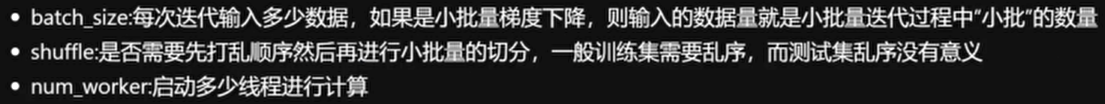

In [35]:
train_loader = DataLoader(LBC_train,batch_size=10,shuffle=True)
test_loader = DataLoader(LBC_test,batch_size=10,shuffle=False)

此处需要注意，对于测试集来说，数据装载并不是一定要进行的，如果测试集只是用于检测模型效果，有时可以不用装载直接带入计算

同样，经过DataLoader处理后的数据也可以使用dataset属性查看原数据

In [37]:
train_loader.dataset == LBC_train

True

因此，为了更好的适应深度学习真实应用场景，在使用包括数据切分等常用函数时，函数使用优先级是<br>Pytorch原生函数和类>依据张量及其常用方法手动创建的函数>Scikit-Learn函数

## 建模及评估过程 

接下来，我们尝试通过调库实现完整的数据切分、训练、查看建模结果一整个流程

<li> 数据准备过程

In [1]:
# 生成数据
features,labels = tensorGenReg()
features = features[:,:-1] # 删除最后全为1的列

# 创建一个针对手动创建数据的数据类
class GenData(Dataset):
    def __init__(self,features,labels): # 创建该类时需要输入的数据集
        self.features = features       # features 属性返回数据集特征
        self.labels = labels           # Labels 属性返回数据集标签
        self.lens = len(features)      # Lens 属性返回数据集大小
        
    def __getitem__(self,index):
        # 调用该方法时需要输入index数值，方法最终返回index对应的特征和标签
        return self.features[index,:],self.labels[index]
    
    def __len__(self):
        # 调用该方法不需要输入额外参数，方法最终返回数据集大小
        return self.lens
    
# 实例化对象
data = GenData(features,labels)

# 切分数据集
num_train = int(data.lens * 0.7)
num_test = data.lens - num_train
data_train,data_test = random_split(data,[num_train,num_test])

# 加载数据
train_loader = DataLoader(data_train,batch_size=10,shuffle=True)
test_loader = DataLoader(data_test,batch_size=10,shuffle=False)

<li> 构建模型

In [2]:
# 初始化核心参数
batch_size = 10  # 每一个小批的数量
lr = 0.03        # 学习率
num_epochs = 3   # 训练过程遍历几次数据

# Stage 1.定义模型
class LR(nn.Module):
   # 定义模型的点线结构
    def __init__(self,in_features = 2,out_features = 1):
        super().__init__()
        self.linear = nn.Linear(in_features,out_features)
    # 定义模型的正向传播规则
    def forward(self,x):
        out = self.linear(x)
        return out
    
# 实例化模型
LR_model = LR()

# Stage 2. 定义损失函数
criterion = nn.MSELoss()

# Stage 3. 定义优化方法
optimizer = optim.SGD(LR_model.parameters(),lr = 0.03)

# Stage 4. 模型训练与测试
def fit(net,criterion,optimizer,batchdata,epochs = 3):
    for epoch in range(epochs):
        for X,y in batchdata:
            # 前向传播
            yhat = net.forward(X)
            # 计算损失
            loss = criterion(yhat,y)
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

<li> 模型训练与测试

In [3]:
fit(net = LR_model
   ,criterion = criterion
   ,optimizer = optimizer
   ,batchdata = train_loader
   ,epochs = num_epochs)

In [4]:
# 查看模型
LR_model

LR(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [5]:
# 查看模型参数
list(LR_model.parameters())

[Parameter containing:
 tensor([[ 2.0008, -1.0007]], requires_grad=True),
 Parameter containing:
 tensor([0.9991], requires_grad=True)]

<li> 查看训练结果

In [6]:
# 计算训练集MSE
F.mse_loss(LR_model(data[data_train.indices][0]),data[data_train.indices][1])
# 计算测试集MSE
F.mse_loss(LR_model(data[data_test.indices][0]),data[data_test.indices][1])

tensor(0.0001, grad_fn=<MseLossBackward0>)

tensor(0.0001, grad_fn=<MseLossBackward0>)

至此，即完成了整个从数据集切分到模型训练，再到查看模型在不同数据集上表现的全过程

# 实用函数补充 

<li> 数据封装、切分和加载函数

该函数可以直接将输入的特征和标签直接进行封装、切分和加载。该函数可以直接处理此前定义的数据生成器创建的数据。

In [7]:
def split_loader(features, labels, batch_size=10, rate=0.7):
    '''
    数据封装、切分和加载函数:
    :param features: 输入的特征
    :param labels: 数据集标签张量
    :param batch_size: 数据加时的每一个小批数据量
    :param rate: 训练集数据占比
    :return: 加载好的训练集和测试集
    '''
    data = GenData(features,labels)
    num_train = int(data.lens * 0.7)
    num_test = data.lens - num_train
    data_train,data_test = random_split(data,[num_train,num_test])
    train_loder = DataLoader(data_train,batch_size=batch_size,shuffle=True)
    test_loader = DataLoader(data_test,batch_size=batch_size,shuffle=False)
    return(train_loder,test_loader)

<li> 模型训练函数

模型训练函数并不是新的函数，此处正式对其进行定义并写入自定义模块中，方便后续调用。

In [9]:
def fit(net,criterion,optimizer,batchdata,epochs=3,cla = False):
    '''
    模型训练函数
    :param net: 待训练的模型
    :param criterion: 损失函数
    :param optimizer: 优化算法
    :param batchdata: 训练数据集
    :param cla: 是否是分类问题
    :param epochs: 遍历数据次数
    '''
    for epochs in range(epochs):
        for X,y in batchdata:
            # 如果是分类问题，需要对y进行整数转化
            if cla == True:
                y = y.flatten().long()
            yhat = net.forward(X)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

<li>MSE计算函数

接下来，我们借助F.mse loss，定义一个可以直接根据模型输出结果和加载后的数据计算MSE的函数

In [10]:
def mse_cal(data_loader,net):
    '''
    :param data loader:加载好的数据
    :param net: 模型
    :return: 根据输入的数据，输出其MSE计算结果
    
    '''
    data = data_loader.dataset  # 还原Dataset类
    X = data[:][0]              # 还原数据的特征
    y = data[:][1]              # 还原数据的标签
    yhat = net(X)
    return F.mse_loss(yhat,y)

<li> 准确率计算函数

类似的，定义一个分类问题的准确率计算函数，同样要求输入是加载后的数据集和训练完成的模型。

In [12]:
def accurary_cal(data_loader,net):
    '''
    :param data_loader:加载好的数据
    :param net: 模型
    :return: 根据输入的数据，输出其准确率计算结果
    '''
    data = data_loader.dataset  # 还原Dataset类
    X = data[:][0]              # 还原数据的特征
    y = data[:][1]              # 还原数据的标签
    zhat = net(X)               # 默认是分类问题，并且输出结果是未经softmax转化的结果
    soft_z = F.softmax(zhat,1)  # 进行softmax转化
    acc_bool = torch.argmax(soft_z,1).flatten() == y.flatten()
    acc = torch.mean(acc_bool.float())
    return acc

至此，完成本阶段实用函数的添加